# Logistic Regression
In this notebook, we implement logistic regression and apply it to two
diﬀerent datasets.

## Implementation
### Sigmoid function
Before you start with the actual cost function, recall that the logistic regres-
sion hypothesis is defined as: 
$$h_θ(x) = g(θ^Tx)$$
where function g is the sigmoid function. The sigmoid function is defined as:
$$g(z) = \frac{1}{1 + e^{−z}}$$


In [156]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import sklearn.linear_model

plt.style.use('ggplot')
# plt.style.available

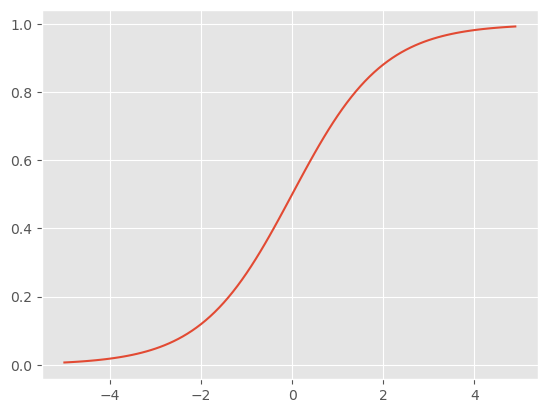

In [157]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

xs = np.arange(-5, 5, 0.1)
ys = sigmoid(xs)
plt.plot(xs, ys)

## Cost function and gradient

Now we implement the cost function and gradient for logistic regression.
Complete the code in costFunction.m to return the cost and gradient. Recall that the cost function in logistic regression is defined as:

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log(h_\theta(x^{(i)})) - (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$


And the gradient of the cost is a vector of the same length as $(\theta)$ where the (j)-th element (for (j = 0, 1, \dots, n)) is defined as follows:

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$


Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.

In [158]:
def J(X, y):
    """
    Compute the cost function and gradients for logistic regression using Mean Squared Error (MSE).
    
    The function `J` takes as input the feature matrix `X` and target values `y`, and returns a pair of functions:
    - hypothesis: This function computes the predictions for a given parameter vector `theta`
    - cost: This function computes the cost (or objective) of the model for a given parameter vector `theta` using MSE.
    - gradients: This function computes the gradient of the cost function with respect to the parameters `theta`.
    """
    m = len(y)
    ones = np.ones((m, 1))
    X_padded = np.hstack((ones, X))
    epsilon = 1e-10  # To avoid log(0)

    def hypothesis(theta):  
        return sigmoid(X_padded @ np.array(theta))
    
    def cost(theta): 
        return np.sum(-y*np.log(hypothesis(theta)+epsilon) - (1-y)*np.log(1-hypothesis(theta)+epsilon)) / m

    def gradients(theta): 
        return (1 / m) * (hypothesis(theta) - y) @ X_padded

    return hypothesis, cost, gradients

In [159]:
# TODO: This does not converge
def gradient_descent(X, y, theta0=None, learning_rate=0.01, iterations=1000):
    """
    Perform logistic regression using batch gradient descent to minimize 
    the cost function.
    
    This function fits a logistic regression model to the input dataset 
    by iteratively adjusting the parameter vector `theta` using gradient descent.
    """
    theta = np.zeros(X.shape[1]+1) if theta0 is None else theta0
    hypothesis, cost, gradients = J(X, y)
    predictions, costs, grads = [], [], []
    for i in range(iterations):
        p, c, g = hypothesis(theta), cost(theta), gradients(theta)
        theta -= learning_rate * g
        predictions.append(p) 
        costs.append(c) 
        grads.append(g)
    return {'theta': theta, 'costs': costs, 'gradients': grads, 'predictions': predictions}

In [160]:
def logistic1(X, y, theta0=None, learning_rate=0.01, iterations=1000):
    fit = gradient_descent(X, y, theta0, learning_rate, iterations)
    return fit['theta']

In [161]:
def logistic2(X, y, theta0=None):
    """
    Performs logistic regression using a numerical optimization algorithm (L-BFGS-B) to minimize the cost function.
    """

    if theta0 is None: theta0 = np.zeros(X.shape[1]+1)
    predictions, cost, gradients = J(X, y)
    result = scipy.optimize.minimize(fun=cost, jac=gradients, x0=theta0, method='L-BFGS-B')
    return result

In [162]:
def logistic3(X, y, theta0=None):
    """
    Performs logistic regression using a numerical optimization algorithm (BFGS) to minimize the cost function.
    """

    if theta0 is None: theta0 = np.zeros(X.shape[1]+1)
    predictions, cost, gradients = J(X, y)
    result = scipy.optimize.minimize(fun=cost, x0=theta0, method='BFGS')
    return result

In [163]:
def logistic4(X, y):
    model = sklearn.linear_model.LogisticRegression()
    model.fit(X, y)
    return model.intercept_, model.coef_

## First Example
In this part of the exercise, we build a logistic regression model to
predict whether a student gets admitted into a university. 

Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant’s scores on two exams and the admissions
decision.

We build a classification model that estimates an applicant’s
probability of admission based the scores from those two exams. 

## Visualizing the data
Before starting to implement any learning algorithm, it is always good to
visualize the data if possible. Here we load the
data and display it on a 2-dimensional plot.

In [164]:
data1txt = "34.62365962451697,78.0246928153624,0;30.28671076822607,43.89499752400101,0;35.84740876993872,72.90219802708364,0;60.18259938620976,86.30855209546826,1;79.0327360507101,75.3443764369103,1;45.08327747668339,56.3163717815305,0;61.10666453684766,96.51142588489624,1;75.02474556738889,46.55401354116538,1;76.09878670226257,87.42056971926803,1;84.43281996120035,43.53339331072109,1;95.86155507093572,38.22527805795094,0;75.01365838958247,30.60326323428011,0;82.30705337399482,76.48196330235604,1;69.36458875970939,97.71869196188608,1;39.53833914367223,76.03681085115882,0;53.9710521485623,89.20735013750205,1;69.07014406283025,52.74046973016765,1;67.94685547711617,46.67857410673128,0;70.66150955499435,92.92713789364831,1;76.97878372747498,47.57596364975532,1;67.37202754570876,42.83843832029179,0;89.67677575072079,65.79936592745237,1;50.534788289883,48.85581152764205,0;34.21206097786789,44.20952859866288,0;77.9240914545704,68.9723599933059,1;62.27101367004632,69.95445795447587,1;80.1901807509566,44.82162893218353,1;93.114388797442,38.80067033713209,0;61.83020602312595,50.25610789244621,0;38.78580379679423,64.99568095539578,0;61.379289447425,72.80788731317097,1;85.40451939411645,57.05198397627122,1;52.10797973193984,63.12762376881715,0;52.04540476831827,69.43286012045222,1;40.23689373545111,71.16774802184875,0;54.63510555424817,52.21388588061123,0;33.91550010906887,98.86943574220611,0;64.17698887494485,80.90806058670817,1;74.78925295941542,41.57341522824434,0;34.1836400264419,75.2377203360134,0;83.90239366249155,56.30804621605327,1;51.54772026906181,46.85629026349976,0;94.44336776917852,65.56892160559052,1;82.36875375713919,40.61825515970618,0;51.04775177128865,45.82270145776001,0;62.22267576120188,52.06099194836679,0;77.19303492601364,70.45820000180959,1;97.77159928000232,86.7278223300282,1;62.07306379667647,96.76882412413983,1;91.56497449807442,88.69629254546599,1;79.94481794066932,74.16311935043758,1;99.2725269292572,60.99903099844988,1;90.54671411399852,43.39060180650027,1;34.52451385320009,60.39634245837173,0;50.2864961189907,49.80453881323059,0;49.58667721632031,59.80895099453265,0;97.64563396007767,68.86157272420604,1;32.57720016809309,95.59854761387875,0;74.24869136721598,69.82457122657193,1;71.79646205863379,78.45356224515052,1;75.3956114656803,85.75993667331619,1;35.28611281526193,47.02051394723416,0;56.25381749711624,39.26147251058019,0;30.05882244669796,49.59297386723685,0;44.66826172480893,66.45008614558913,0;66.56089447242954,41.09209807936973,0;40.45755098375164,97.53518548909936,1;49.07256321908844,51.88321182073966,0;80.27957401466998,92.11606081344084,1;66.74671856944039,60.99139402740988,1;32.72283304060323,43.30717306430063,0;64.0393204150601,78.03168802018232,1;72.34649422579923,96.22759296761404,1;60.45788573918959,73.09499809758037,1;58.84095621726802,75.85844831279042,1;99.82785779692128,72.36925193383885,1;47.26426910848174,88.47586499559782,1;50.45815980285988,75.80985952982456,1;60.45555629271532,42.50840943572217,0;82.22666157785568,42.71987853716458,0;88.9138964166533,69.80378889835472,1;94.83450672430196,45.69430680250754,1;67.31925746917527,66.58935317747915,1;57.23870631569862,59.51428198012956,1;80.36675600171273,90.96014789746954,1;68.46852178591112,85.59430710452014,1;42.0754545384731,78.84478600148043,0;75.47770200533905,90.42453899753964,1;78.63542434898018,96.64742716885644,1;52.34800398794107,60.76950525602592,0;94.09433112516793,77.15910509073893,1;90.44855097096364,87.50879176484702,1;55.48216114069585,35.57070347228866,0;74.49269241843041,84.84513684930135,1;89.84580670720979,45.35828361091658,1;83.48916274498238,48.38028579728175,1;42.2617008099817,87.10385094025457,1;99.31500880510394,68.77540947206617,1;55.34001756003703,64.9319380069486,1;74.77589300092767,89.52981289513276,1"

data1 = np.mat(data1txt)
data1 = np.array(data1)
data1[0:5]

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ]])

In [165]:
X1 = np.array(data1[:, 0:-1])
y1 = np.array(data1[:, -1]).flatten()
print(X1[0:3])
print(y1[0:3])

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]]
[0. 0. 0.]


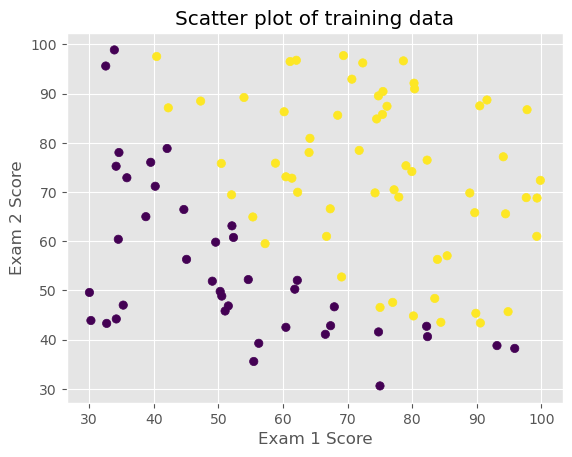

In [166]:
def plotData(data, xlabel='Exam 1 Score', ylabel='Exam 2 Score', title='Scatter plot of training data'):
    plt.scatter(data[:, 0], data[:, 1], c=data[:, 2])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

plotData(data1)

In [167]:
logistic1(X1, y1, learning_rate=0.01, iterations=5000)

array([-3.84169298,  0.17760752, -0.29485853])

In [168]:
logistic2(X1, y1)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 0.20349770144568563
        x: [-2.516e+01  2.062e-01  2.015e-01]
      nit: 31
      jac: [-2.257e-08  1.002e-06 -2.688e-06]
     nfev: 36
     njev: 36
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [169]:
logistic3(X1, y1)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.20349770144680052
        x: [-2.516e+01  2.062e-01  2.015e-01]
      nit: 20
      jac: [ 2.049e-08  2.328e-06  5.215e-07]
 hess_inv: [[ 3.218e+03 -2.563e+01 -2.627e+01]
            [-2.563e+01  2.181e-01  1.965e-01]
            [-2.627e+01  1.965e-01  2.297e-01]]
     nfev: 108
     njev: 27

In [170]:
logistic4(X1, y1)

(array([-25.05219314]), array([[0.20535491, 0.2005838 ]]))

## Plotting Decision Boundary


In [171]:
def fit_plot_boundary(X, y, xmin=0, ymin=0, xmax=100, ymax=100, xlabel='', ylabel='', num=200):
    def predict(X, theta):
        ones = np.ones((X.shape[0], 1))
        X_padded = np.hstack((ones, X))
        return sigmoid(X_padded @ np.array(theta))
    # Extract parameters from optimizer result
    theta = logistic2(X, y).x  
    preds = []
    for i in np.linspace(xmin, xmax, num):
        for j in np.linspace(ymin, ymax, num):
            p = predict(np.array([[i, j]]), theta)
            if 0.45 < p < 0.55: preds.append((i, j))
    # Create lists of x and y coordinates from stored predictions
    a, b = [point[0] for point in preds], [point[1] for point in preds]
    # Plotting data points
    plt.scatter(X[:, 0], X[:, 1], c=y)
    # Plotting Boundary
    plt.scatter(a, b, color='red', s=1) 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

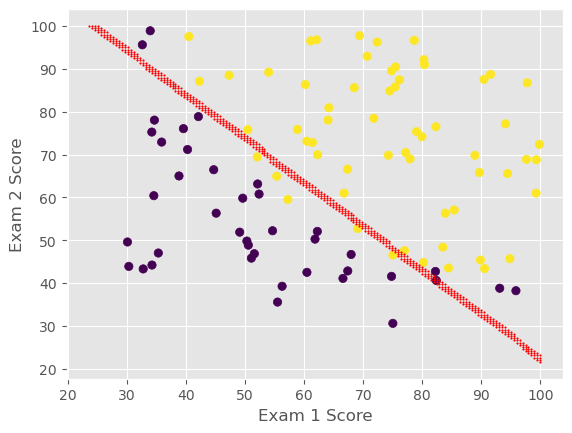

In [172]:
fit_plot_boundary(X1, y1, xlabel="Exam 1 Score", ylabel="Exam 2 Score")

# Regularized logistic regression
In this part of the exercise, we implement regularized logistic regression
to predict whether microchips from a fabrication plant passes quality assur-
ance (QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly.

Suppose you are the product manager of the factory and you have the
test results for some microchips on two diﬀerent tests. From these two tests,
you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results
on past microchips, from which you can build a logistic regression model.

In [173]:
data2txt = "0.051267,0.69956,1;-0.092742,0.68494,1;-0.21371,0.69225,1;-0.375,0.50219,1;-0.51325,0.46564,1;-0.52477,0.2098,1;-0.39804,0.034357,1;-0.30588,-0.19225,1;0.016705,-0.40424,1;0.13191,-0.51389,1;0.38537,-0.56506,1;0.52938,-0.5212,1;0.63882,-0.24342,1;0.73675,-0.18494,1;0.54666,0.48757,1;0.322,0.5826,1;0.16647,0.53874,1;-0.046659,0.81652,1;-0.17339,0.69956,1;-0.47869,0.63377,1;-0.60541,0.59722,1;-0.62846,0.33406,1;-0.59389,0.005117,1;-0.42108,-0.27266,1;-0.11578,-0.39693,1;0.20104,-0.60161,1;0.46601,-0.53582,1;0.67339,-0.53582,1;-0.13882,0.54605,1;-0.29435,0.77997,1;-0.26555,0.96272,1;-0.16187,0.8019,1;-0.17339,0.64839,1;-0.28283,0.47295,1;-0.36348,0.31213,1;-0.30012,0.027047,1;-0.23675,-0.21418,1;-0.06394,-0.18494,1;0.062788,-0.16301,1;0.22984,-0.41155,1;0.2932,-0.2288,1;0.48329,-0.18494,1;0.64459,-0.14108,1;0.46025,0.012427,1;0.6273,0.15863,1;0.57546,0.26827,1;0.72523,0.44371,1;0.22408,0.52412,1;0.44297,0.67032,1;0.322,0.69225,1;0.13767,0.57529,1;-0.0063364,0.39985,1;-0.092742,0.55336,1;-0.20795,0.35599,1;-0.20795,0.17325,1;-0.43836,0.21711,1;-0.21947,-0.016813,1;-0.13882,-0.27266,1;0.18376,0.93348,0;0.22408,0.77997,0;0.29896,0.61915,0;0.50634,0.75804,0;0.61578,0.7288,0;0.60426,0.59722,0;0.76555,0.50219,0;0.92684,0.3633,0;0.82316,0.27558,0;0.96141,0.085526,0;0.93836,0.012427,0;0.86348,-0.082602,0;0.89804,-0.20687,0;0.85196,-0.36769,0;0.82892,-0.5212,0;0.79435,-0.55775,0;0.59274,-0.7405,0;0.51786,-0.5943,0;0.46601,-0.41886,0;0.35081,-0.57968,0;0.28744,-0.76974,0;0.085829,-0.75512,0;0.14919,-0.57968,0;-0.13306,-0.4481,0;-0.40956,-0.41155,0;-0.39228,-0.25804,0;-0.74366,-0.25804,0;-0.69758,0.041667,0;-0.75518,0.2902,0;-0.69758,0.68494,0;-0.4038,0.70687,0;-0.38076,0.91886,0;-0.50749,0.90424,0;-0.54781,0.70687,0;0.10311,0.77997,0;0.057028,0.91886,0;-0.10426,0.99196,0;-0.081221,1.1089,0;0.28744,1.087,0;0.39689,0.82383,0;0.63882,0.88962,0;0.82316,0.66301,0;0.67339,0.64108,0;1.0709,0.10015,0;-0.046659,-0.57968,0;-0.23675,-0.63816,0;-0.15035,-0.36769,0;-0.49021,-0.3019,0;-0.46717,-0.13377,0;-0.28859,-0.060673,0;-0.61118,-0.067982,0;-0.66302,-0.21418,0;-0.59965,-0.41886,0;-0.72638,-0.082602,0;-0.83007,0.31213,0;-0.72062,0.53874,0;-0.59389,0.49488,0;-0.48445,0.99927,0;-0.0063364,0.99927,0;0.63265,-0.030612,0"

data2 = np.mat(data2txt)
data2 = np.array(data2)
data1[0:5]

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ]])

In [174]:
X2 = np.array(data2[:, 0:-1])
y2 = np.array(data2[:, -1]).flatten()
print(X2[0:3])
print(y2[0:3])

[[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]]
[1. 1. 1.]


## Visualizing the data
Similar to the previous parts of this exercise, plotData is used to generate a
figure like Figure 3, where the axes are the two test scores, and the positive
(y = 1, accepted) and negative (y = 0, rejected) examples are shown with
diﬀerent markers.

Note that the dataset cannot be separated into positive and
negative examples by a straight-line through the plot. Therefore, a straight-
forward application of logistic regression will not perform well on this dataset
since logistic regression will only be able to find a linear decision boundary.

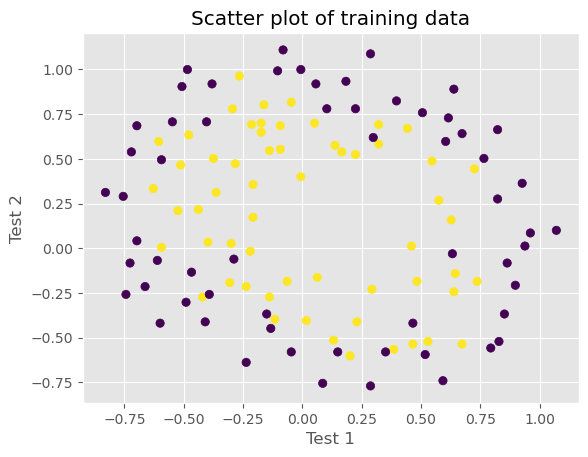

In [175]:
plotData(data2, 'Test 1', 'Test 2')

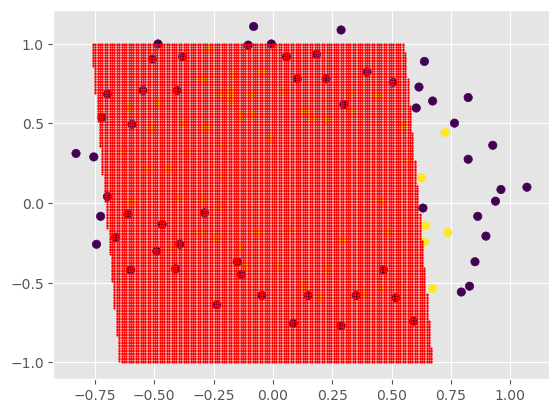

In [176]:
fit_plot_boundary(X2, y2, xmin=-1.0, ymin=-1.0, xmax=1.0, ymax=1.0)

In [177]:
def predict(X, theta):
    ones = np.ones((X.shape[0], 1))
    X_padded = np.hstack((ones, X))
    return sigmoid(X_padded @ np.array(theta))

In [179]:
X3 = np.hstack((X2, X2*X2))
y3 = y2
X3[0:5]

array([[ 0.051267  ,  0.69956   ,  0.00262831,  0.48938419],
       [-0.092742  ,  0.68494   ,  0.00860108,  0.4691428 ],
       [-0.21371   ,  0.69225   ,  0.04567196,  0.47921006],
       [-0.375     ,  0.50219   ,  0.140625  ,  0.2521948 ],
       [-0.51325   ,  0.46564   ,  0.26342556,  0.21682061]])

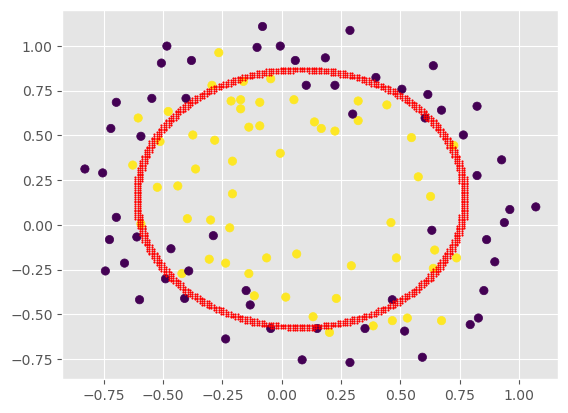

In [180]:
theta = logistic2(X3, y3).x
preds = []
for i in np.linspace(-1, 1, 200):
    for j in np.linspace(-1, 1, 200):
        p = predict(np.array([[i, j, i*i, j*j]]), theta)
        if 0.45 < p < 0.55: preds.append((i, j))
# Create lists of x and y coordinates from stored predictions
a, b = [point[0] for point in preds], [point[1] for point in preds]
# Plotting data points
plt.scatter(X3[:, 0], X3[:, 1], c=y3)
# Plotting Boundary
plt.scatter(a, b, color='red', s=1)
plt.show()